# **ULEZ project analysis notebook**

This notebook will take you through our

*  Exploratory Data Analysis
*  Time Series Forecast

The datasets you will use are produced from the cleaning notebook and are made available in CFG-Group3Project repository
* in_ulez_clean.csv
* exp_ulez_clean.csv
* exp_ulez_sites_only_clean.csv






In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
# importing the initial ULEZ dataset
in_ulez_data = pd.read_csv('/content/drive/MyDrive/ULEZ/in_ulez_clean.csv')
in_ulez_data.head()

,site_name,site_borough,site_code,latitude,longitude,site_type,date,NO2_value,prov_rat,avg_temperature,min_temperature,max_temperature,precipitation,snow_depth,avg_wind_direction,avg_wind_speed,avg_air_pressure
0,Bloomsbury,Camden,BL0,51.522287,-0.125848,Urban Background,2017-01-01,24.5,R,5.9,4.0,9.4,0.3,0.0,241.0,14.0,1018.6
1,Bloomsbury,Camden,BL0,51.522287,-0.125848,Urban Background,2017-02-01,34.5,R,10.5,8.0,12.0,3.0,0.0,180.0,13.3,1006.5
2,Bloomsbury,Camden,BL0,51.522287,-0.125848,Urban Background,2017-03-01,46.9,R,8.0,6.0,10.0,1.5,0.0,248.0,20.0,998.2
3,Bloomsbury,Camden,BL0,51.522287,-0.125848,Urban Background,2017-04-01,45.8,R,12.8,11.0,15.0,0.3,0.0,212.0,15.6,1009.4
4,Bloomsbury,Camden,BL0,51.522287,-0.125848,Urban Background,2017-05-01,59.6,R,11.2,10.0,13.0,1.5,0.0,117.0,16.1,1004.2


In [173]:
# converting the date format to datetime
in_ulez_data['date'] = pd.to_datetime(in_ulez_data['date'])



---

# **Exploratory Data Analysis (EDA) for initial ULEZ**

Exploratory Data Analysis (EDA) involves examining and summarising data to gain insights.

Below are various visualisations we used to analyse how nitrogen dioxide (NO2) behaved from 1 January 2017 to 31 December 2022, considering the introduction and expansion of the Ultra Low Emission Zone (ULEZ) on 8 April 2019 and 25 October 2021.


#### **Line plot of NO2 over time**
Plotting the NO2 values over time to visualize the trend.

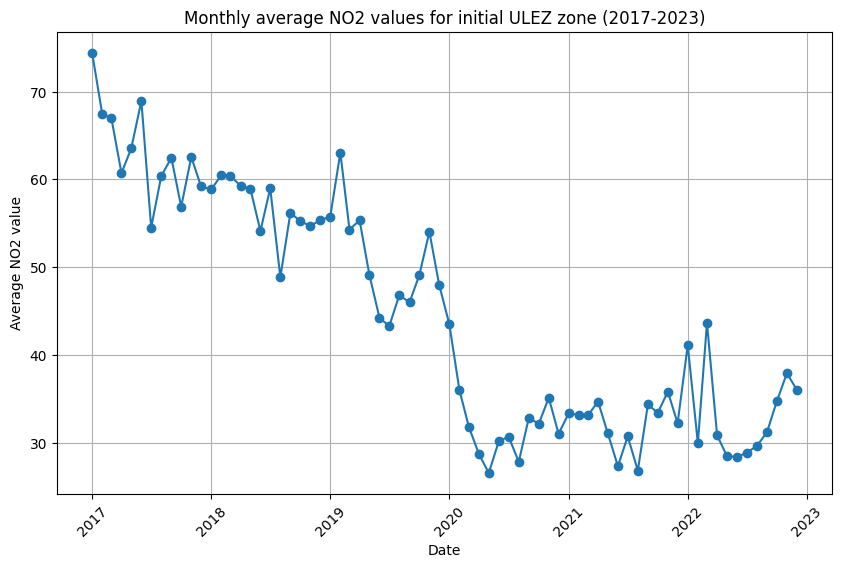

In [174]:
# grouping data by month and calculating average NO2 values
monthly_avg_no2 = in_ulez_data.groupby(in_ulez_data['date'].dt.to_period('M'))['NO2_value'].mean()

# plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_no2.index.to_timestamp(), monthly_avg_no2.values, marker='o')
plt.title('Monthly average NO2 values for initial ULEZ zone (2017-2023)')
plt.xlabel('Date')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




There is a general decline in average monthly NO2 when the Initial ULEZ zones are introduced.

January 2020 is when we first see NO2 dropping below 40 micrograms per cubic metre of air (µgm-3) across all boroughs. Regulations require that the annual mean concentration of NO2 must not exceed 40 µgm-3. See [gov.uk](https://www.gov.uk/government/statistics/air-quality-statistics/ntrogen-dioxide) for more information.

It should be pointed out that April 2020 which had one of the lowest levels of NO2 in this dataset was around the same time as the peak of covid in London where the city went into lockdown. An immediate knock on effect was that there was a dramatic reduction in the number of people traveling within the city naturally contributing to less poultion. Even so the plots below show a positive improvement in NO2 levels post covid 21/22 onwards after the ULEZ zone has been expanded.

Plotting the NO2 values over time to visualise the trend with added colour to show values before the initial introduction of ULEZ, from introduction and before the expansion, and after the expansion.

<Figure size 1000x600 with 0 Axes>

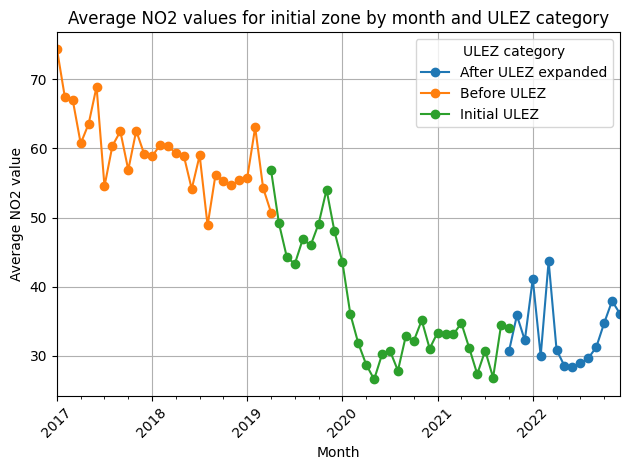

In [175]:
# defining the ULEZ introduction and expansion dates
ulez_introduction = '2019-04-08'
ulez_expansion = '2021-10-25'

# categorising data based on ULEZ introduction and expansion dates
in_ulez_data['ulez_category'] = np.where(in_ulez_data['date'] < ulez_introduction, 'Before ULEZ',
                               np.where(in_ulez_data['date'] <= ulez_expansion, 'Initial ULEZ', 'After ULEZ expanded'))

# grouping data by month and ULEZ category, and calculate average NO2 values
monthly_ulez_avg_no2 = in_ulez_data.groupby([in_ulez_data['date'].dt.to_period('M'), 'ulez_category'])['NO2_value'].mean().unstack()


# plotting
plt.figure(figsize=(10, 6))
monthly_ulez_avg_no2.plot(marker='o')

plt.title('Average NO2 values for initial zone by month and ULEZ category')
plt.xlabel('Month')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='ULEZ category')
plt.tight_layout()
plt.show()

#### **Line plot of the yearly average NO2 by borough**

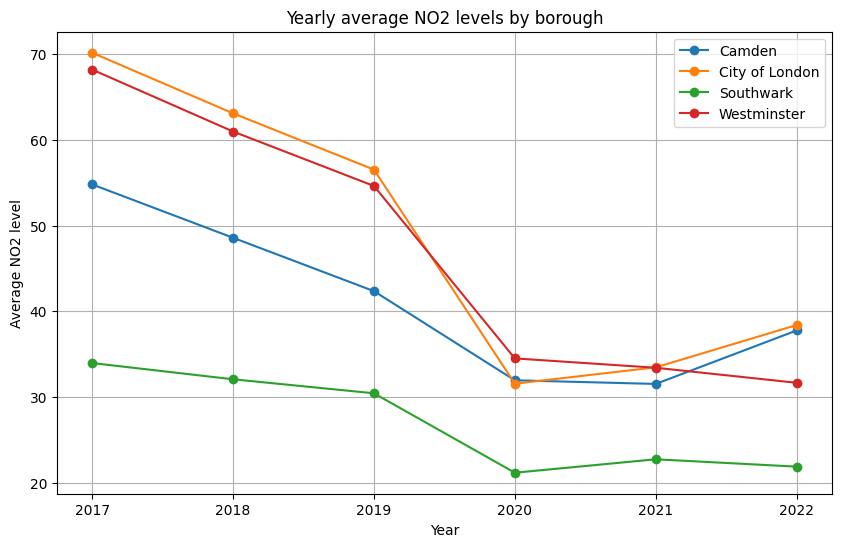

In [176]:
in_ulez_data['year'] = in_ulez_data['date'].dt.year

# calculating yearly average NO2 by borough
avg_no2_by_borough = in_ulez_data.groupby(['year', 'site_borough'])['NO2_value'].mean().reset_index()

# getting a list of unique boroughs
boroughs = avg_no2_by_borough['site_borough'].unique()

# creating a line plot for each borough
plt.figure(figsize=(10, 6))

for borough in boroughs:
    borough_data = avg_no2_by_borough[avg_no2_by_borough['site_borough'] == borough]
    plt.plot(borough_data['year'], borough_data['NO2_value'], label=borough, marker='o')

plt.title('Yearly average NO2 levels by borough')
plt.xlabel('Year')
plt.ylabel('Average NO2 level')
plt.legend()
plt.grid(True)
plt.show()

#### **Histogram of NO2 values**

Displaying the distribution of NO2 values.
This historgram is leaning towards a right-positively skewed distribution and that that the most common occurances of recorded NO2 levels were between 25 and 30 µgm-3 with fewer frequency of NO2 above 100.

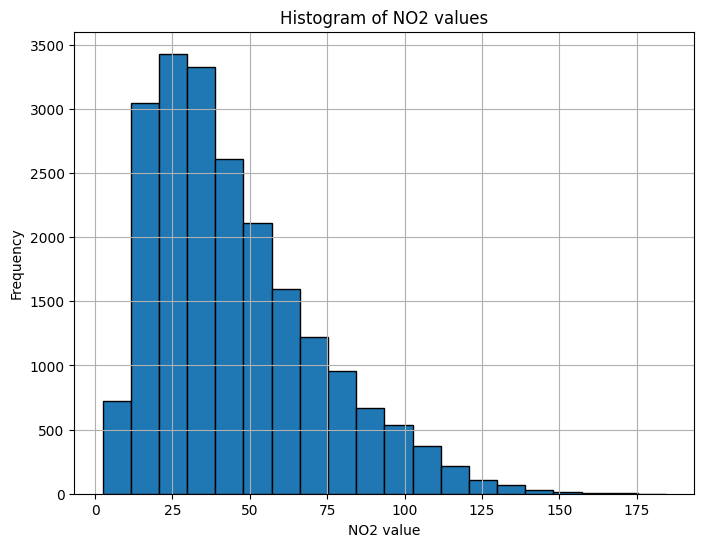

In [177]:
# plotting histogram of NO2 values
plt.figure(figsize=(8, 6))
plt.hist(in_ulez_data['NO2_value'], bins=20, edgecolor='black')
plt.title('Histogram of NO2 values')
plt.xlabel('NO2 value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### **Box plot of NO2 by borough**

Comparing the distribution of NO2 values across different boroughs.

The box plots highlight the median NO2 levels of 25-30 as mentioned above. The differences in spread of the levels of NO2 per borough are easier to pick out.City of London has the largest spread of values. There are a number of outliers per borough where there are NO2 levels over 100 µgm-3.

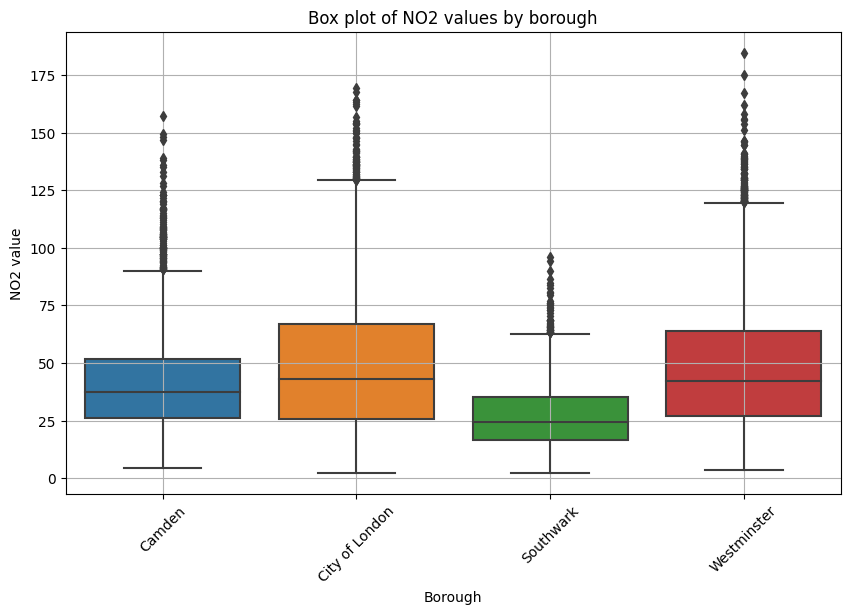

In [178]:
# plotting box plot of NO2 values by borough
plt.figure(figsize=(10, 6))
sns.boxplot(data=in_ulez_data, x='site_borough', y='NO2_value')
plt.title('Box plot of NO2 values by borough')
plt.xlabel('Borough')
plt.ylabel('NO2 value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### **Bar plot of NO2 by borough**

Comparing the distribution of NO2 values across different boroughs before the initial introduction of ULEZ, from introduction and before the expansion, and after the expansion.

<Figure size 1000x600 with 0 Axes>

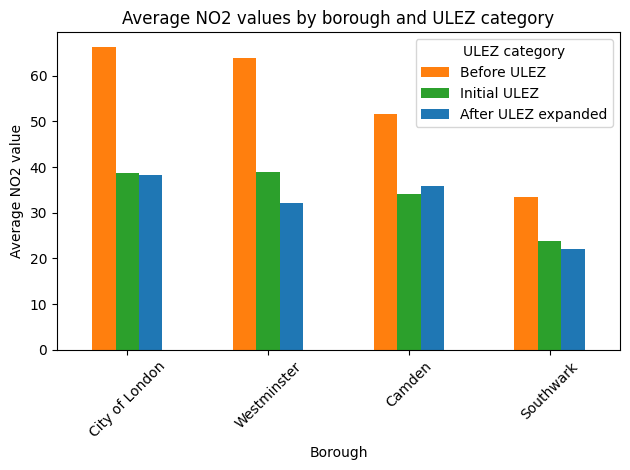

In [179]:
# grouping data by borough and ULEZ category, and calculate average NO2 values
borough_ulez_avg_no2 = in_ulez_data.groupby(['site_borough', 'ulez_category'])['NO2_value'].mean().unstack()

# calculating the mean of each row and sorting the DataFrame by mean values in descending order
sorted_indices = borough_ulez_avg_no2.mean(axis=1).sort_values(ascending=False).index
sorted_df = borough_ulez_avg_no2.loc[sorted_indices]

# calculating the mean of each column and sorting the columns in descending order
sorted_columns = sorted_df.mean().sort_values(ascending=False).index
sorted_df = sorted_df[sorted_columns]

# setting the order of the colours so they match the line graph above
bar_colors = ['tab:orange', 'tab:green', 'tab:blue']

plt.figure(figsize=(10, 6))
sorted_df.plot(kind='bar', color=bar_colors)
plt.title('Average NO2 values by borough and ULEZ category')
plt.xlabel('Borough')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='ULEZ category')
plt.show()

#### **Bar plot of NO2 by site type**

Comparing the distribution of NO2 values across different site types before the initial introduction of ULEZ, from introduction and before the expansion, and after the expansion. This shows noteable declines in road and kerbside with since the initial zone is implemented which is great for pedestrians.



<Figure size 1000x600 with 0 Axes>

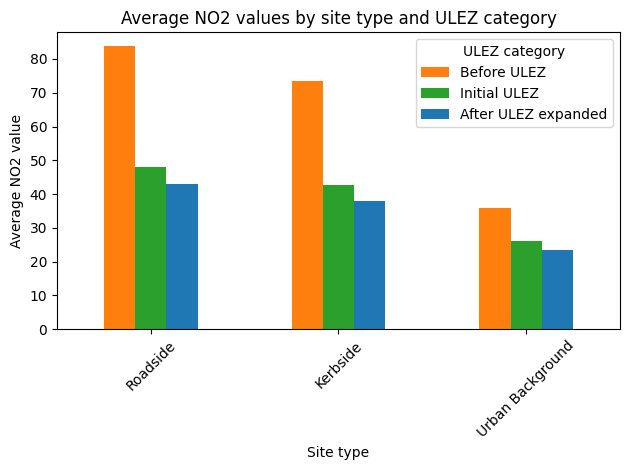

In [180]:
# grouping data by borough and ULEZ category, and calculating average NO2 values
site_type_ulez_avg_no2 = in_ulez_data.groupby(['site_type', 'ulez_category'])['NO2_value'].mean().unstack()

# calculating the mean of each row and sorting the DataFrame by mean values in descending order
sorted_indices = site_type_ulez_avg_no2.mean(axis=1).sort_values(ascending=False).index
sorted_df = site_type_ulez_avg_no2.loc[sorted_indices]

# calculating the mean of each column and sorting the columns in descending order
sorted_columns = sorted_df.mean().sort_values(ascending=False).index
sorted_df = sorted_df[sorted_columns]

# setting the order of the colours so they match the line graph above
bar_colors = ['tab:orange', 'tab:green', 'tab:blue']

plt.figure(figsize=(10, 6))
sorted_df.plot(kind='bar', color=bar_colors)
plt.title('Average NO2 values by site type and ULEZ category')
plt.xlabel('Site type')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='ULEZ category')
plt.show()

#### **Scatter plot of NO2 vs. temperature**

Exploring the relationship between NO2 and average temperature.

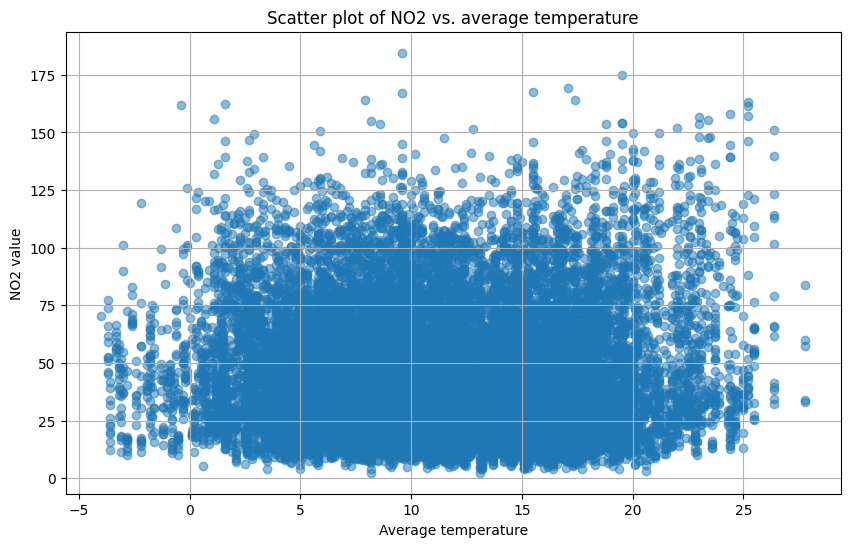

In [181]:
# plotting scatter plot of NO2 vs. average temperature
plt.figure(figsize=(10, 6))
plt.scatter(in_ulez_data['avg_temperature'], in_ulez_data['NO2_value'], alpha=0.5)
plt.title('Scatter plot of NO2 vs. average temperature')
plt.xlabel('Average temperature')
plt.ylabel('NO2 value')
plt.grid(True)
plt.show()

Exploring the relationship between NO2 and maximum temperature.


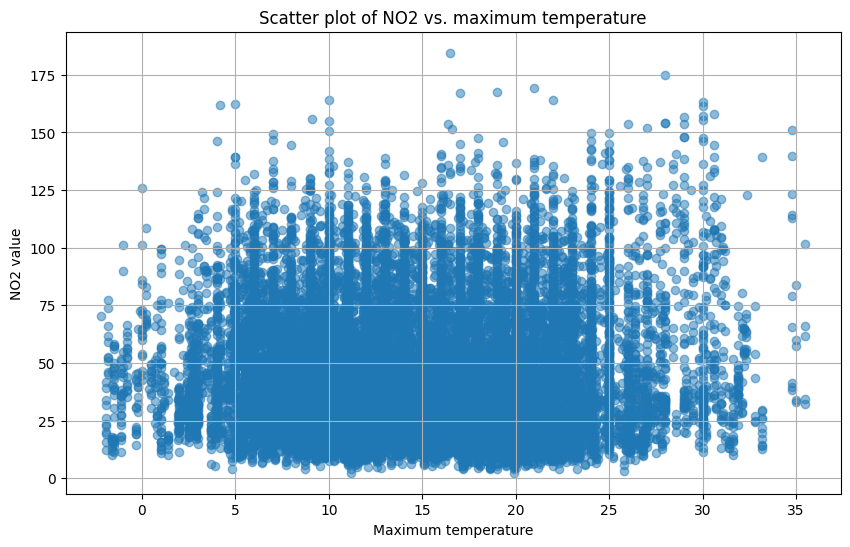

In [182]:
# plotting scatter plot of NO2 vs. max temperature
plt.figure(figsize=(10, 6))
plt.scatter(in_ulez_data['max_temperature'], in_ulez_data['NO2_value'], alpha=0.5)
plt.title('Scatter plot of NO2 vs. maximum temperature')
plt.xlabel('Maximum temperature')
plt.ylabel('NO2 value')
plt.grid(True)
plt.show()

There is a decline in average daily NO2 values across all boroughs. The decline is most notable in the boroughs of Westminster and City of London. This can be seen clearly in the plot below which is the average on a yearly basis.

Seperating the plots by boroughs helps us see that each borough had varying levels of NO2. We could attribute that to the borough of the City of London for example being highly densly populated with vechicle access.

What each plot has shown is that there was a great improvement in air quality from the introduction of ULEZ when analysing NO2 alone.



#### **Correlation Heatmap**

Calculating and visualising the correlation between numerical variables.

There are high correlations between average temperature and maximum temperatures. There aren't any other highly positive correlations.

<ipython-input-183-ecd61f61ca63>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = in_ulez_data.corr()


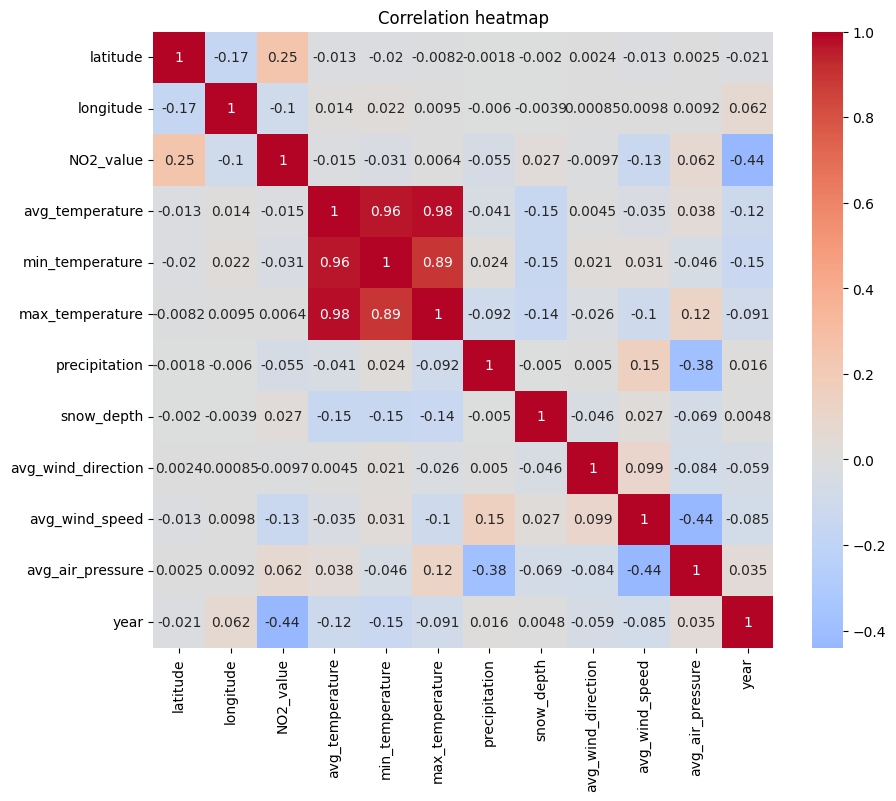

In [183]:
# calculating correlation matrix
correlation_matrix = in_ulez_data.corr()

# plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation heatmap')
plt.show()

#### **Summary Statistics Table**

Computing summary statistics for NO2 values, such as mean, median, min, max, etc.


In [184]:
# using describe to see count, mean, std, min, max, 25%, 50% and 75%
summary_stats = in_ulez_data.groupby('site_borough')['NO2_value'].describe()

summary_stats

,count,mean,std,min,25%,50%,75%,max
site_borough,,,,,,,,
Camden,3411.0,41.656494,21.891737,4.6,26.1,37.5,51.8,157.00000
City of London,6253.0,49.020246,29.090863,2.4,25.7,42.9,67.1,169.39999
Southwark,2055.0,27.173625,14.146698,2.4,16.5,24.4,35.2,96.10000
Westminster,9332.0,47.689959,26.877737,3.8,26.9,42.1,64.0,184.60001




---



# **Exploratory Data Analysis (EDA) for expanded ULEZ**

Building on the analysis of the inital zone here we are analysing the data for the second phase of ULEZ (what we are calling 'expanded ULEZ').


In [185]:
# importing the expanded ULEZ dataset
exp_ulez_data = pd.read_csv('/content/drive/MyDrive/ULEZ/exp_ulez_clean.csv')
exp_ulez_data.head()

,site_name,site_borough,site_code,latitude,longitude,site_type,date,NO2_value,prov_rat,avg_temperature,min_temperature,max_temperature,precipitation,snow_depth,avg_wind_direction,avg_wind_speed,avg_air_pressure
0,Ikea,Brent,BT4,51.552476,-0.258089,Roadside,2017-01-01,60.8,R,5.9,4.0,9.4,0.3,0.0,241.0,14.0,1018.6
1,Ikea,Brent,BT4,51.552476,-0.258089,Roadside,2017-02-01,79.1,R,10.4,9.3,11.2,3.0,0.0,180.0,14.6,1006.5
2,Ikea,Brent,BT4,51.552476,-0.258089,Roadside,2017-03-01,96.5,R,6.9,5.1,9.1,1.5,0.0,248.0,16.6,998.2
3,Ikea,Brent,BT4,51.552476,-0.258089,Roadside,2017-04-01,72.5,R,11.7,8.8,16.1,0.3,0.0,214.0,14.3,1009.4
4,Ikea,Brent,BT4,51.552476,-0.258089,Roadside,2017-05-01,136.0,R,10.7,8.4,13.3,1.5,0.0,109.0,14.2,1004.2


In [186]:
# converting the date format to datetime
exp_ulez_data['date'] = pd.to_datetime(exp_ulez_data['date'])

#### **Line plot of NO2 over time**
Plotting the NO2 values over time to visualize the trend.

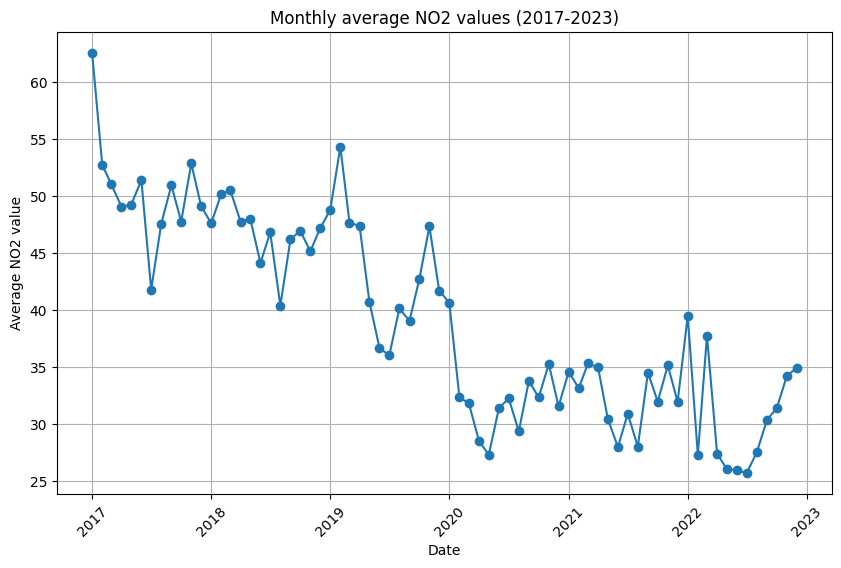

In [187]:
# grouping data by month and calculating average NO2 values
monthly_avg_no2 = exp_ulez_data.groupby(exp_ulez_data['date'].dt.to_period('M'))['NO2_value'].mean()

# plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_no2.index.to_timestamp(), monthly_avg_no2.values, marker='o')
plt.title('Monthly average NO2 values (2017-2023)')
plt.xlabel('Date')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Plotting the NO2 values over time to visualize the trend with added colour to show values before the initial introduction of ULEZ, from introduction and before the expanshion, and after the expansion.

<Figure size 1000x600 with 0 Axes>

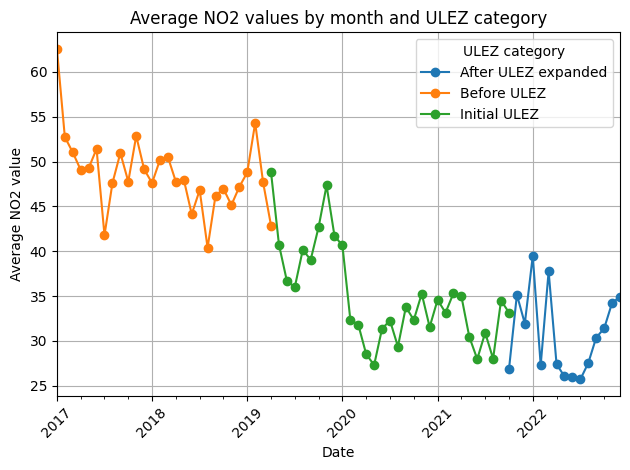

In [188]:
# defining the ULEZ introduction and expansion dates
ulez_introduction = '2019-04-08'
ulez_expansion = '2021-10-25'

# categorising data based on ULEZ introduction and expansion dates
exp_ulez_data['ulez_category'] = np.where(exp_ulez_data['date'] < ulez_introduction, 'Before ULEZ',
                               np.where(exp_ulez_data['date'] <= ulez_expansion, 'Initial ULEZ', 'After ULEZ expanded'))

# grouping data by month and ULEZ category, and calculate average NO2 values
monthly_ulez_avg_no2 = exp_ulez_data.groupby([exp_ulez_data['date'].dt.to_period('M'), 'ulez_category'])['NO2_value'].mean().unstack()


# plotting
plt.figure(figsize=(10, 6))
monthly_ulez_avg_no2.plot(marker='o')
plt.title('Average NO2 values by month and ULEZ category')
plt.xlabel('Date')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='ULEZ category')
plt.tight_layout()
plt.show()

#### **Line plot of the yearly average NO2 by borough**

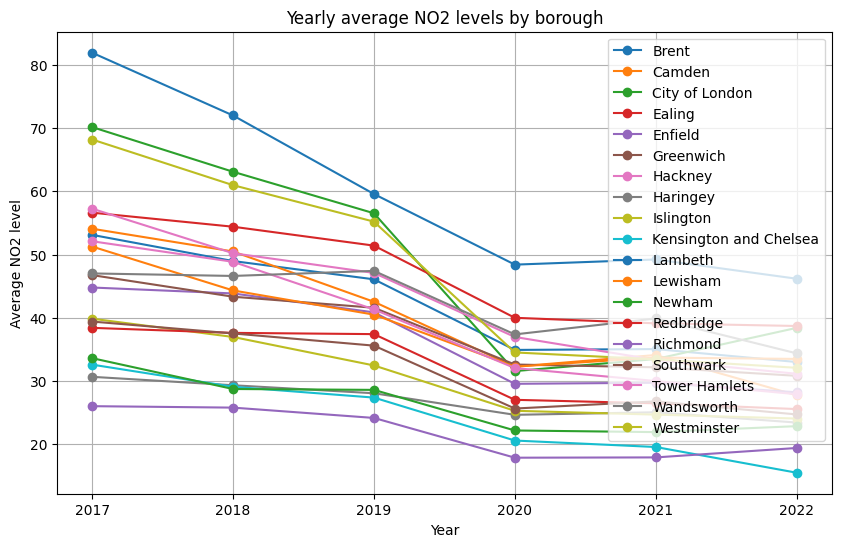

In [189]:
exp_ulez_data['year'] = exp_ulez_data['date'].dt.year

# calculating yearly average NO2 by borough
avg_no2_by_borough = exp_ulez_data.groupby(['year', 'site_borough'])['NO2_value'].mean().reset_index()

# getting a list of unique boroughs
boroughs = avg_no2_by_borough['site_borough'].unique()

# creating a line plot for each borough
plt.figure(figsize=(10, 6))

for borough in boroughs:
    borough_data = avg_no2_by_borough[avg_no2_by_borough['site_borough'] == borough]
    plt.plot(borough_data['year'], borough_data['NO2_value'], label=borough, marker='o')

plt.title('Yearly average NO2 levels by borough')
plt.xlabel('Year')
plt.ylabel('Average NO2 level')
plt.legend()
plt.grid(True)
plt.show()

#### **Histogram of NO2 values**

Displaying the distribution of NO2 values.

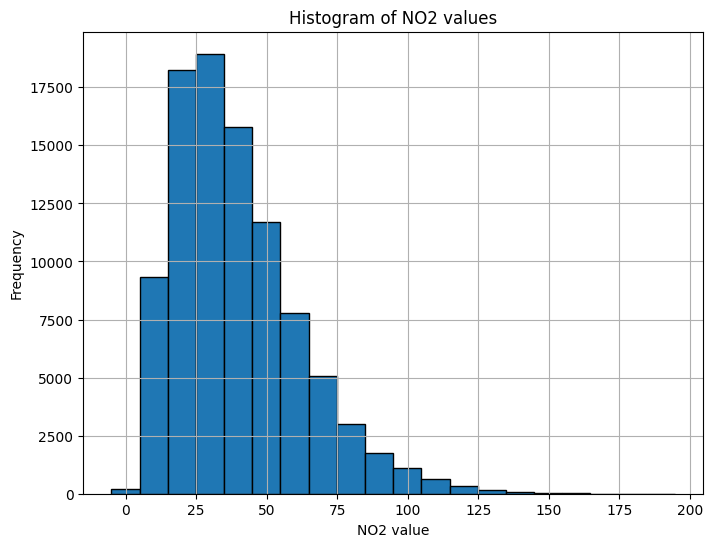

In [190]:
# plotting histogram of NO2 values
plt.figure(figsize=(8, 6))
plt.hist(exp_ulez_data['NO2_value'], bins=20, edgecolor='black')
plt.title('Histogram of NO2 values')
plt.xlabel('NO2 value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### **Box plot of NO2 by borough**

Comparing the distribution of NO2 values across different boroughs.

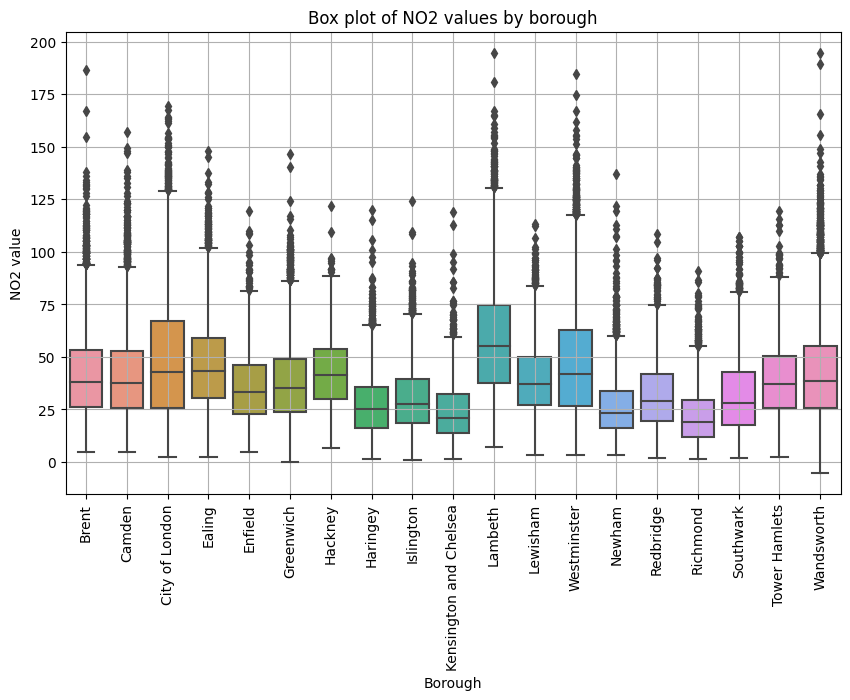

In [191]:
# plotting box plot of NO2 values by borough
plt.figure(figsize=(10, 6))
sns.boxplot(data=exp_ulez_data, x='site_borough', y='NO2_value')
plt.title('Box plot of NO2 values by borough')
plt.xlabel('Borough')
plt.ylabel('NO2 value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#### **Bar plot of NO2 by borough**

Comparing the distribution of NO2 values across different boroughs before the initial introduction of ULEZ, from introduction and before the expansion, and after the expansion.

<Figure size 1000x600 with 0 Axes>

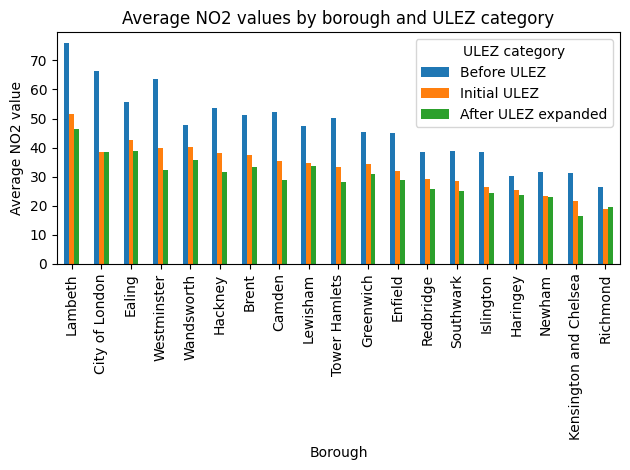

In [192]:
# Group data by borough and ULEZ category, and calculate average NO2 values
borough_ulez_avg_no2 = exp_ulez_data.groupby(['site_borough', 'ulez_category'])['NO2_value'].mean().unstack()

# Calculate the mean of each row and sort the DataFrame by mean values in descending order
sorted_indices = borough_ulez_avg_no2.mean(axis=1).sort_values(ascending=False).index
sorted_df = borough_ulez_avg_no2.loc[sorted_indices]

# Calculate the mean of each column and sort the columns in descending order
sorted_columns = sorted_df.mean().sort_values(ascending=False).index
sorted_df = sorted_df[sorted_columns]

# set the order of the colours so they match the line graph above
bar_colors = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize=(10, 6))
sorted_df.plot(kind='bar', color=bar_colors)
plt.title('Average NO2 values by borough and ULEZ category')
plt.xlabel('Borough')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='ULEZ category')
plt.show()

#### **Bar plot of NO2 by site type**

<Figure size 1000x600 with 0 Axes>

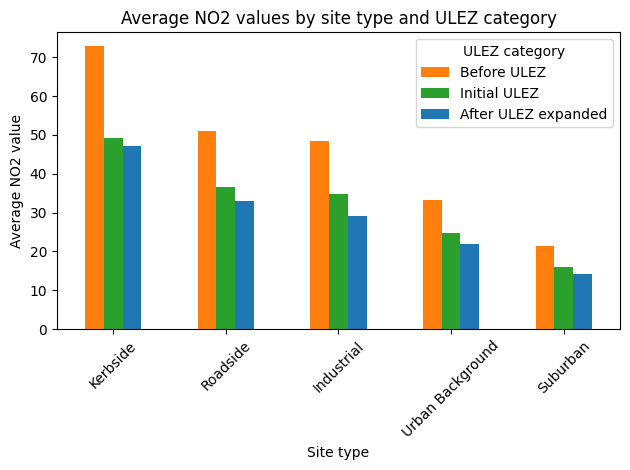

In [193]:
# grouping data by borough and ULEZ category, and calculating average NO2 values
site_type_ulez_avg_no2 = exp_ulez_data.groupby(['site_type', 'ulez_category'])['NO2_value'].mean().unstack()

# calculating the mean of each row and sorting the DataFrame by mean values in descending order
sorted_indices = site_type_ulez_avg_no2.mean(axis=1).sort_values(ascending=False).index
sorted_df = site_type_ulez_avg_no2.loc[sorted_indices]

# calculating the mean of each column and sorting the columns in descending order
sorted_columns = sorted_df.mean().sort_values(ascending=False).index
sorted_df = sorted_df[sorted_columns]

# setting the order of the colours so they match the line graph above
bar_colors = ['tab:orange', 'tab:green', 'tab:blue']

plt.figure(figsize=(10, 6))
sorted_df.plot(kind='bar', color=bar_colors)
plt.title('Average NO2 values by site type and ULEZ category')
plt.xlabel('Site type')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='ULEZ category')
plt.show()

#### **Scatter plot of NO2 vs. temperature**

Exploring the relationship between NO2 and average temperature.

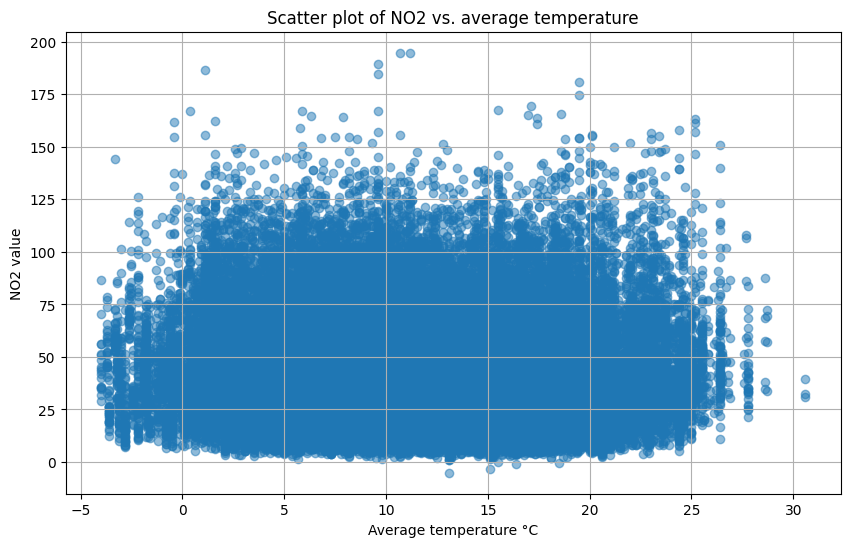

In [194]:
# plotting scatter plot of NO2 vs. average temperature
plt.figure(figsize=(10, 6))
plt.scatter(exp_ulez_data['avg_temperature'], exp_ulez_data['NO2_value'], alpha=0.5)
plt.title('Scatter plot of NO2 vs. average temperature')
plt.xlabel('Average temperature °C')
plt.ylabel('NO2 value')
plt.grid(True)
plt.show()

#### **Correlation Heatmap**

Calculating and visualising the correlation between numerical variables.

<ipython-input-195-49055d9274d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = exp_ulez_data.corr()


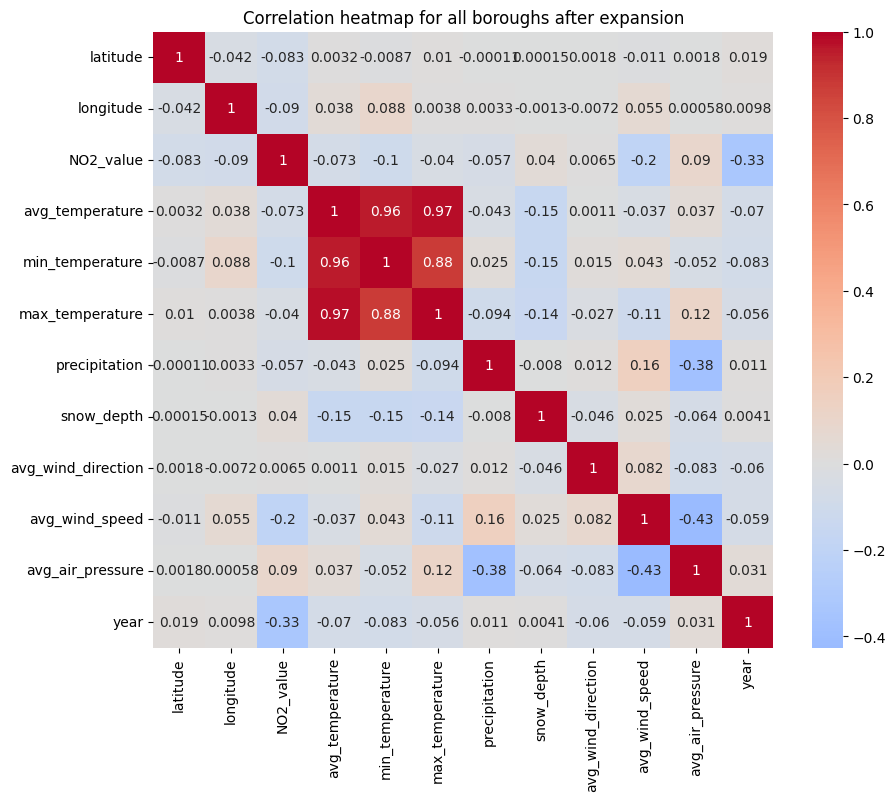

In [195]:
# calculating correlation matrix
correlation_matrix = exp_ulez_data.corr()

# plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation heatmap for all boroughs after expansion')
plt.show()

#### **Summary Statistics Table**

Computing summary statistics for NO2 values, such as mean, median, min, max, etc.

In [196]:
# using describe to see count, mean, std, min, max, 25%, 50% and 75%
summary_stats = exp_ulez_data.groupby('site_borough')['NO2_value'].describe()

summary_stats

,count,mean,std,min,25%,50%,75%,max
site_borough,,,,,,,,
Brent,6330.0,41.740379,20.855836,5.0,26.325,38.20,53.400,186.50000
Camden,5386.0,41.252228,21.258305,4.6,25.800,37.70,52.800,157.00000
City of London,6253.0,49.020246,29.090863,2.4,25.700,42.90,67.100,169.39999
Ealing,6123.0,46.280941,20.920285,2.6,30.500,43.40,59.100,148.20000
Enfield,2108.0,35.924146,17.389254,4.7,22.700,33.30,46.225,119.30000
Greenwich,6247.0,37.921498,18.680766,0.0,23.700,35.30,48.800,146.39999
Hackney,2133.0,42.742804,16.450209,6.8,30.000,41.40,53.600,121.90000
Haringey,4226.0,26.909915,14.150671,1.5,16.000,25.00,35.600,120.10000
Islington,4210.0,30.483230,15.570358,0.8,18.500,27.80,39.400,124.20000


# **Exploratory Data Analysis (EDA) for expanded ONLY**#

Here we are using the filtered the exp_ulez_clean file and showing how the expanded zones looked before and after the introduction of ULEZ.

In [197]:
exp_only_data = pd.read_csv('/content/drive/MyDrive/ULEZ/exp_ulez_sites_only_clean.csv')
exp_only_data.head()

,site_name,site_borough,site_code,latitude,longitude,site_type,date,NO2_value,prov_rat,avg_temperature,min_temperature,max_temperature,precipitation,snow_depth,avg_wind_direction,avg_wind_speed,avg_air_pressure
0,Ikea,Brent,BT4,51.552476,-0.258089,Roadside,2017-01-01,60.8,R,5.9,4.0,9.4,0.3,0.0,241.0,14.0,1018.6
1,Ikea,Brent,BT4,51.552476,-0.258089,Roadside,2017-02-01,79.1,R,10.4,9.3,11.2,3.0,0.0,180.0,14.6,1006.5
2,Ikea,Brent,BT4,51.552476,-0.258089,Roadside,2017-03-01,96.5,R,6.9,5.1,9.1,1.5,0.0,248.0,16.6,998.2
3,Ikea,Brent,BT4,51.552476,-0.258089,Roadside,2017-04-01,72.5,R,11.7,8.8,16.1,0.3,0.0,214.0,14.3,1009.4
4,Ikea,Brent,BT4,51.552476,-0.258089,Roadside,2017-05-01,136.0,R,10.7,8.4,13.3,1.5,0.0,109.0,14.2,1004.2


In [198]:
# converting the date format to datetime
exp_only_data['date'] = pd.to_datetime(exp_only_data['date'])

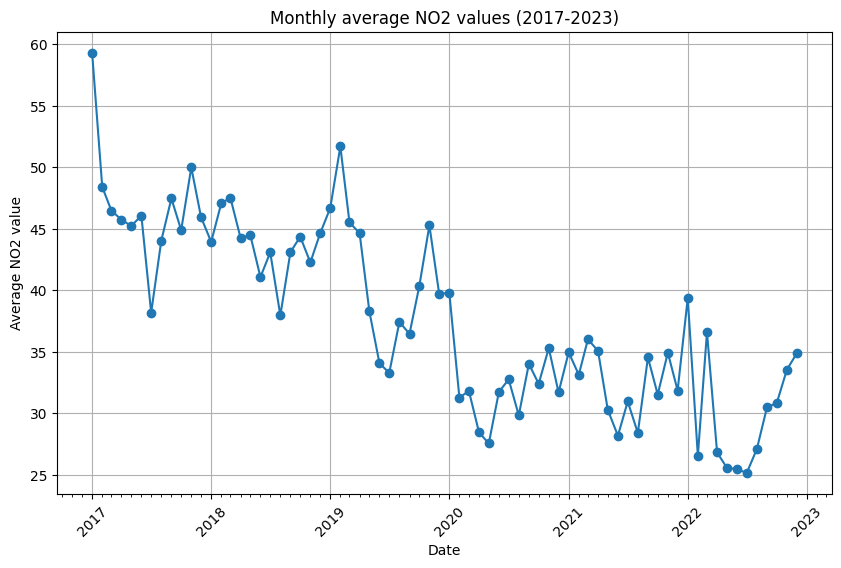

In [199]:
import matplotlib.dates as mdates

# grouping data by month and calculating average NO2 values
monthly_avg_no2 = exp_only_data.groupby(exp_only_data['date'].dt.to_period('M'))['NO2_value'].mean()

# plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_no2.index.to_timestamp(), monthly_avg_no2.values, marker='o')

# Adding month ticks to x-axis. Minor indicate months and Major denotes year
ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Monthly average NO2 values (2017-2023)')
plt.xlabel('Date')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

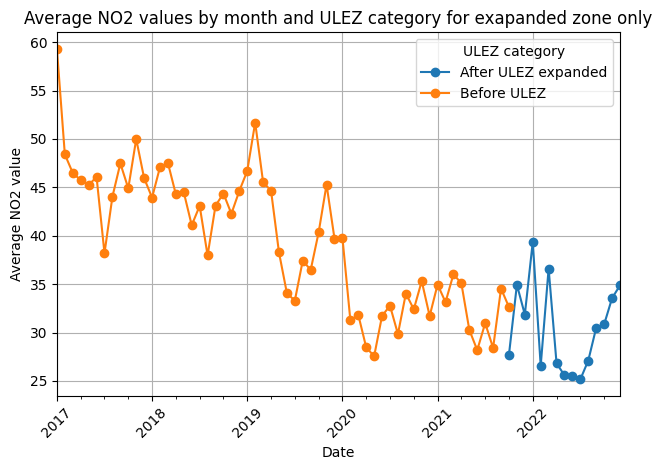

In [200]:
# defining the ULEZ introduction date for the expanded zone
ulez_intro = '2021-10-25'

# categorising data based on ULEZ introduction and expansion dates
exp_only_data['ulez_category'] = np.where(exp_only_data['date'] < ulez_intro,'Before ULEZ',
                                          'After ULEZ expanded')

# grouping data by month and ULEZ category, and calculate average NO2 values
monthly_ulez_avg_no2 = exp_only_data.groupby([exp_only_data['date'].dt.to_period('M'), 'ulez_category'])['NO2_value'].mean().unstack()


# plotting
plt.figure(figsize=(10, 6))
monthly_ulez_avg_no2.plot(marker='o')
plt.title('Average NO2 values by month and ULEZ category for exapanded zone only')
plt.xlabel('Date')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='ULEZ category')
plt.tight_layout()
plt.show()

#### **Line plot of the yearly average NO2 by borough**

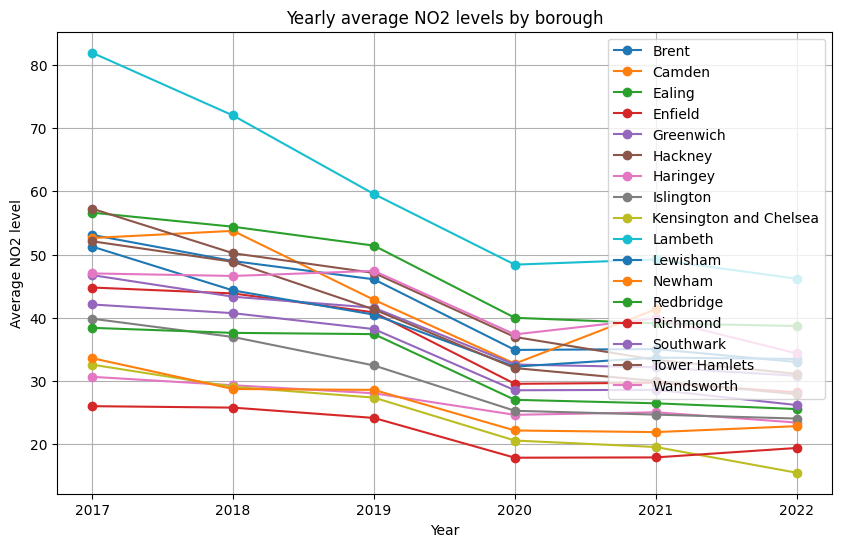

In [201]:
exp_only_data['year'] = exp_only_data['date'].dt.year

# calculating yearly average NO2 by borough
avg_no2_by_borough = exp_only_data.groupby(['year', 'site_borough'])['NO2_value'].mean().reset_index()

# getting a list of unique boroughs
boroughs = avg_no2_by_borough['site_borough'].unique()

# creating a line plot for each borough
plt.figure(figsize=(10, 6))

for borough in boroughs:
    borough_data = avg_no2_by_borough[avg_no2_by_borough['site_borough'] == borough]
    plt.plot(borough_data['year'], borough_data['NO2_value'], label=borough, marker='o')

plt.title('Yearly average NO2 levels by borough')
plt.xlabel('Year')
plt.ylabel('Average NO2 level')
plt.legend()
plt.grid(True)
plt.show()

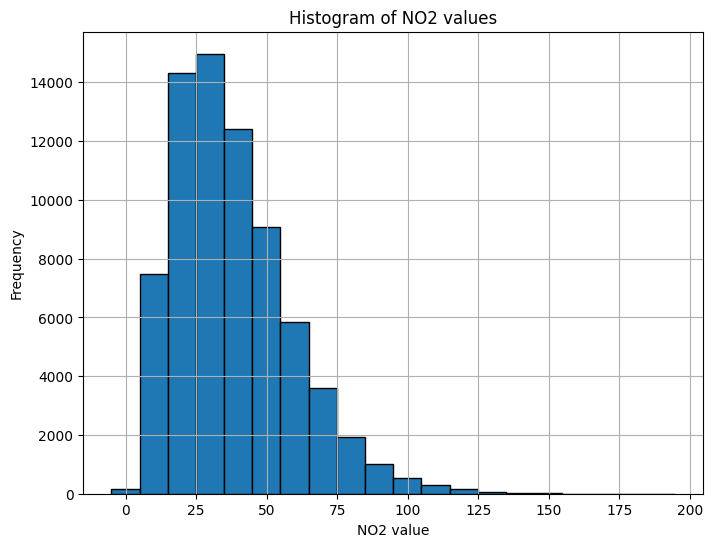

In [202]:
# plotting histogram of NO2 values
plt.figure(figsize=(8, 6))
plt.hist(exp_only_data['NO2_value'], bins=20, edgecolor='black')
plt.title('Histogram of NO2 values')
plt.xlabel('NO2 value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

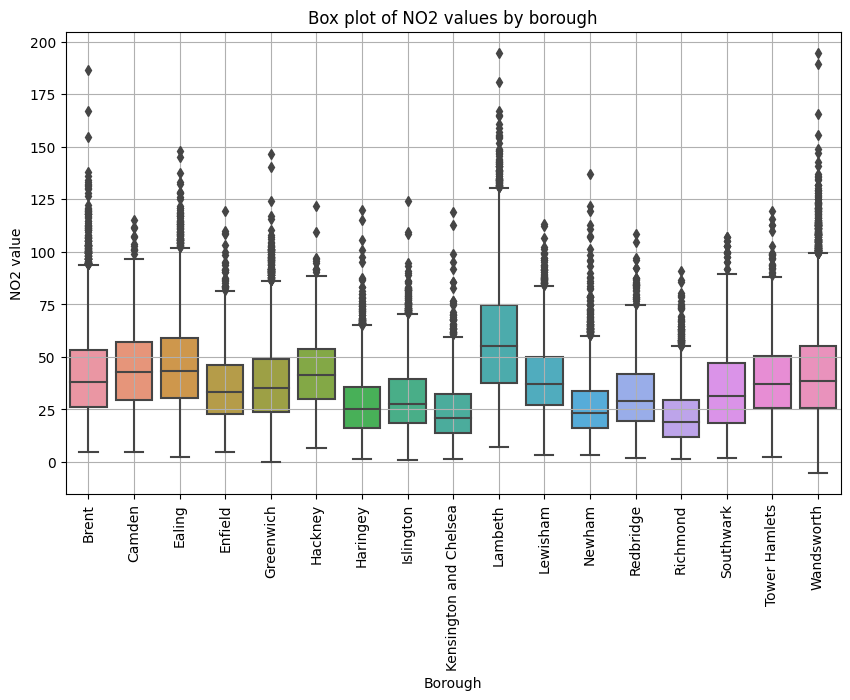

In [203]:
# plotting box plot of NO2 values by borough
plt.figure(figsize=(10, 6))
sns.boxplot(data=exp_only_data, x='site_borough', y='NO2_value')
plt.title('Box plot of NO2 values by borough')
plt.xlabel('Borough')
plt.ylabel('NO2 value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

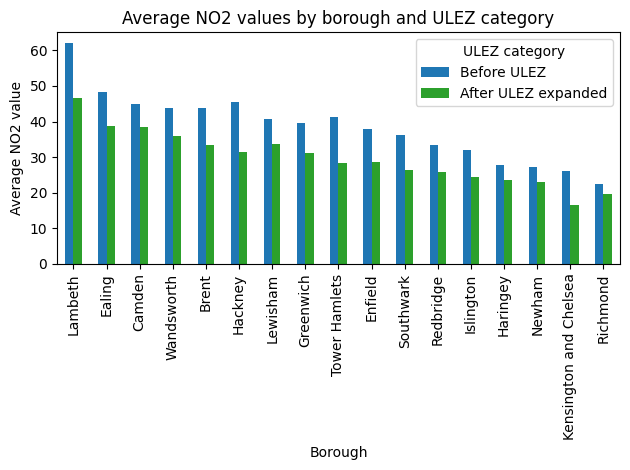

In [204]:
# Group data by borough and ULEZ category, and calculate average NO2 values
borough_ulez_avg_no2 = exp_only_data.groupby(['site_borough', 'ulez_category'])['NO2_value'].mean().unstack()

# Calculate the mean of each row and sort the DataFrame by mean values in descending order
sorted_indices = borough_ulez_avg_no2.mean(axis=1).sort_values(ascending=False).index
sorted_df = borough_ulez_avg_no2.loc[sorted_indices]

# Calculate the mean of each column and sort the columns in descending order
sorted_columns = sorted_df.mean().sort_values(ascending=False).index
sorted_df = sorted_df[sorted_columns]

# set the order of the colours so they match the line graph above
bar_colors = ['tab:blue', 'tab:green']

plt.figure(figsize=(10, 6))
sorted_df.plot(kind='bar', color=bar_colors)
plt.title('Average NO2 values by borough and ULEZ category')
plt.xlabel('Borough')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='ULEZ category')
plt.show()

#### **Bar plot of NO2 by site type**

<Figure size 1000x600 with 0 Axes>

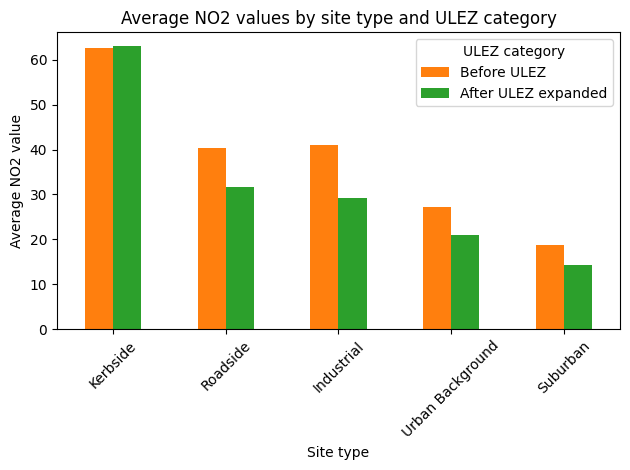

In [205]:
# grouping data by borough and ULEZ category, and calculating average NO2 values
site_type_ulez_avg_no2 = exp_only_data.groupby(['site_type', 'ulez_category'])['NO2_value'].mean().unstack()

# calculating the mean of each row and sorting the DataFrame by mean values in descending order
sorted_indices = site_type_ulez_avg_no2.mean(axis=1).sort_values(ascending=False).index
sorted_df = site_type_ulez_avg_no2.loc[sorted_indices]

# calculating the mean of each column and sorting the columns in descending order
sorted_columns = sorted_df.mean().sort_values(ascending=False).index
sorted_df = sorted_df[sorted_columns]

# setting the order of the colours so they match the line graph above
bar_colors = ['tab:orange', 'tab:green', 'tab:blue']

plt.figure(figsize=(10, 6))
sorted_df.plot(kind='bar', color=bar_colors)
plt.title('Average NO2 values by site type and ULEZ category')
plt.xlabel('Site type')
plt.ylabel('Average NO2 value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='ULEZ category')
plt.show()

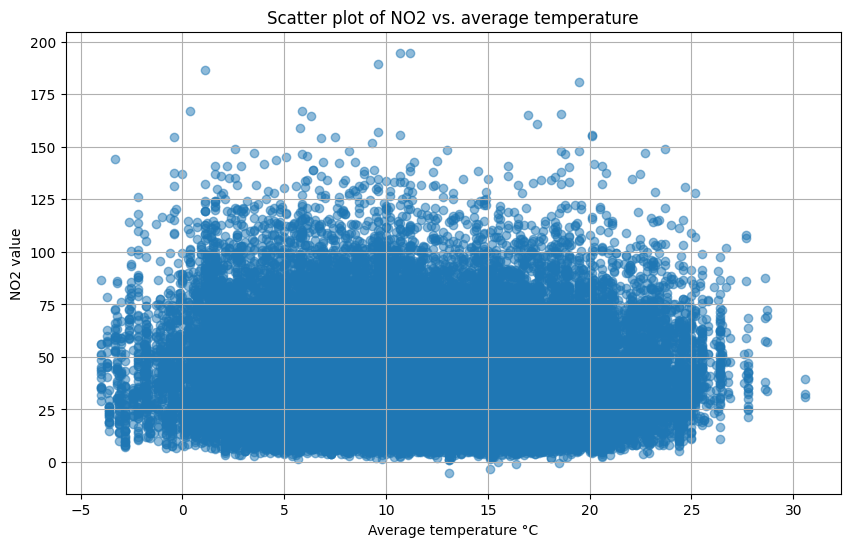

In [206]:
# plotting scatter plot of NO2 vs. average temperature
plt.figure(figsize=(10, 6))
plt.scatter(exp_only_data['avg_temperature'], exp_only_data['NO2_value'], alpha=0.5)
plt.title('Scatter plot of NO2 vs. average temperature')
plt.xlabel('Average temperature °C')
plt.ylabel('NO2 value')
plt.grid(True)
plt.show()

<ipython-input-207-6fc8a168b198>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = exp_only_data.corr()


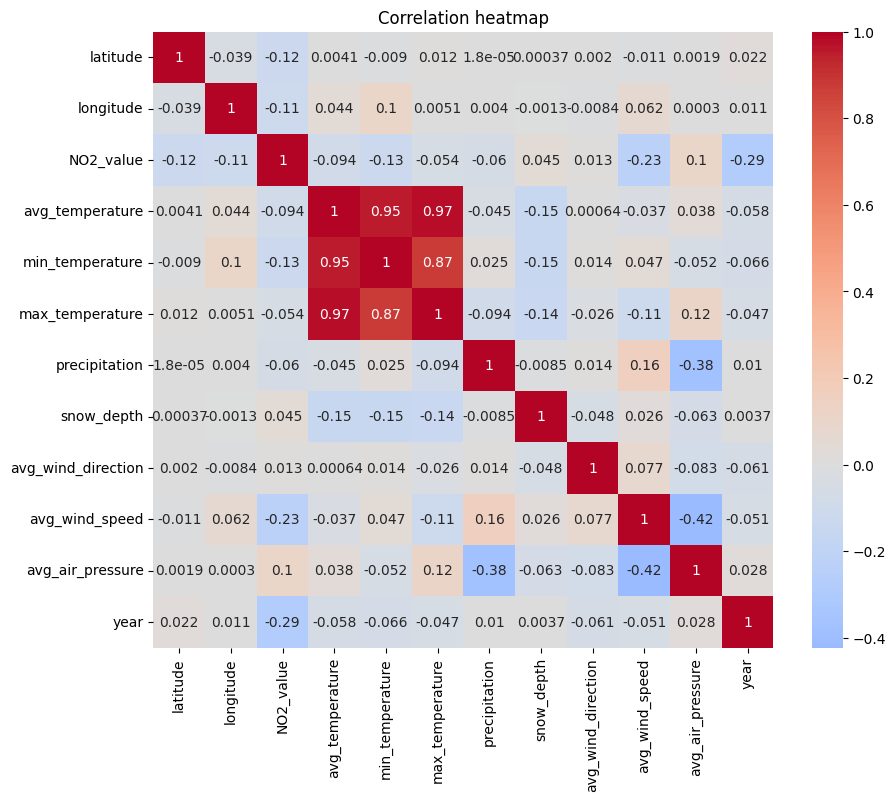

In [207]:
# calculating correlation matrix
correlation_matrix = exp_only_data.corr()

# plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation heatmap')
plt.show()

In [208]:
# using describe to see count, mean, std, min, max, 25%, 50% and 75%
summary_stats = exp_only_data.groupby('site_borough')['NO2_value'].describe()

summary_stats

,count,mean,std,min,25%,50%,75%,max
site_borough,,,,,,,,
Brent,6330.0,41.740379,20.855836,5.0,26.325,38.2,53.400,186.50000
Camden,1626.0,44.805166,18.879493,4.9,29.700,42.7,57.200,115.00000
Ealing,6123.0,46.280941,20.920285,2.6,30.500,43.4,59.100,148.20000
Enfield,2108.0,35.924146,17.389254,4.7,22.700,33.3,46.225,119.30000
Greenwich,6247.0,37.921498,18.680766,0.0,23.700,35.3,48.800,146.39999
Hackney,2133.0,42.742804,16.450209,6.8,30.000,41.4,53.600,121.90000
Haringey,4226.0,26.909915,14.150671,1.5,16.000,25.0,35.600,120.10000
Islington,4210.0,30.483230,15.570358,0.8,18.500,27.8,39.400,124.20000
Kensington and Chelsea,2102.0,24.332778,14.237129,1.4,13.700,21.0,32.275,119.10000


# **Forecasting**

Time Series Forecast

This forecast was showing a repetitive trend i.e. each year winter has high NO2 levels possibly due to more travel in the winter leading upto Christmas and then a dip towards the summer, perhaps due to better weather where you're more likely to walk around or even people leaving the capital for the summer holidays.



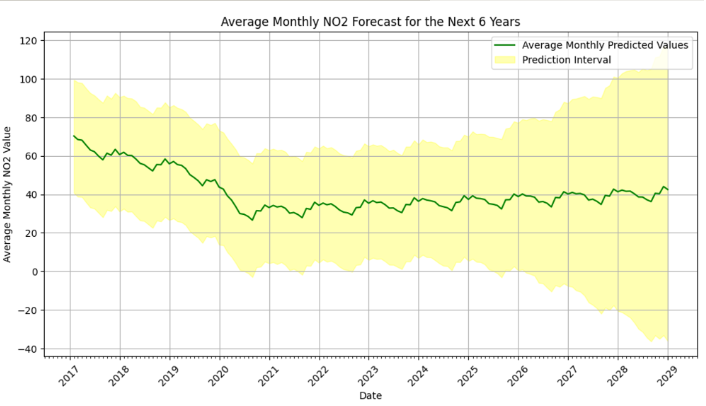

Here we try to reduce the trend and increase accuracy and add in UK holiday dates to simulate seasonality.

What this doesn't factor in is the expected reduction of non-compliant vehicles passing through these boroughs each year (presuming the scrappage scheme works/people drive less by 2029).

In [209]:
# Note : You may need to run these installs first to use the Prophet model to produce the forecasts below.

# !pip install pystan==2.18.0.0
# !pip install fbprophet
# !pip install prophet

In [210]:
import prophet
from prophet import Prophet

Note: running the model can take a minute or so to complete.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6i833upq/gc8cnu6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6i833upq/nd2wcmzt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45250', 'data', 'file=/tmp/tmp6i833upq/gc8cnu6v.json', 'init=/tmp/tmp6i833upq/nd2wcmzt.json', 'output', 'file=/tmp/tmp6i833upq/prophet_modele5_0dnsn/prophet_model-20230827070413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


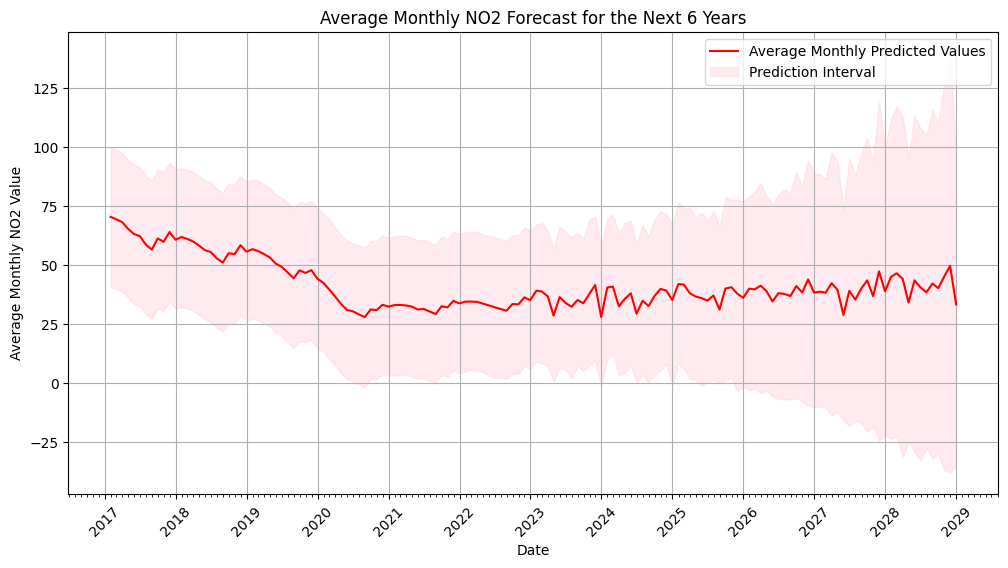

In [211]:
#in_ulez_data = pd.read_csv('/content/drive/MyDrive/ULEZ/in_ulez_clean.csv')


model = Prophet(
    seasonality_mode='multiplicative'
)

# Add holidays or events to the model
model.add_country_holidays(country_name='UK')

# Rename columns for Prophet compatibility
in_ulez_data.rename(columns={'date': 'ds', 'NO2_value': 'y'}, inplace=True)

# Fit the model to your historical data
model.fit(in_ulez_data)

# Creates a dataframe for future dates (next 6 years)

# Changed to be monthly frequency over 6 years (72 months)
future = model.make_future_dataframe(periods=72, freq='M')

# Generate forecasts for future dates
forecast = model.predict(future)

# Aggregate data to monthly averages
monthly_data = forecast.resample('M', on='ds').mean().reset_index()

# Plot average monthly data with month and year tick marks
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['ds'], monthly_data['yhat'], label='Average Monthly Predicted Values', color='red')
plt.fill_between(monthly_data['ds'], monthly_data['yhat_lower'], monthly_data['yhat_upper'], color='pink', alpha=0.3, label='Prediction Interval')
plt.title('Average Monthly NO2 Forecast for the Next 6 Years')
plt.xlabel('Date')
plt.ylabel('Average Monthly NO2 Value')
plt.legend()
plt.grid(True)

# Format x-axis ticks to show year and include monthly ticks
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_minor_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)

plt.show()


## Replicating the forecast using the expanded zone data.

The forecast expects a steady downward trend of NO2 in the expanded boroughs.

Note: running the model can take a minute or so to complete.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6i833upq/z05axnj6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6i833upq/02mow4mu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20934', 'data', 'file=/tmp/tmp6i833upq/z05axnj6.json', 'init=/tmp/tmp6i833upq/02mow4mu.json', 'output', 'file=/tmp/tmp6i833upq/prophet_modelv345us_j/prophet_model-20230827070433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


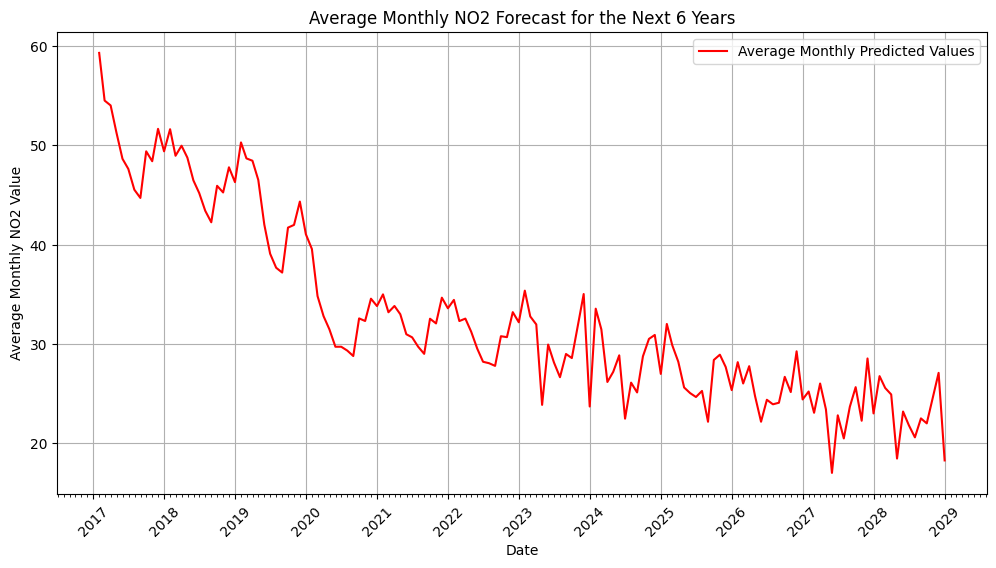

In [212]:
exp_ulez_data = pd.read_csv('/content/drive/MyDrive/ULEZ/exp_ulez_clean.csv')


model = Prophet(
    seasonality_mode='multiplicative'
)

# Add holidays or events to the model
model.add_country_holidays(country_name='UK')

# Rename columns for Prophet compatibility
exp_ulez_data.rename(columns={'date': 'ds', 'NO2_value': 'y'}, inplace=True)

# Fit the model to your historical data
model.fit(exp_ulez_data)

# Creates a dataframe for future dates (next 6 years)
# Changed to be monthly frequency over 6 years (72 months)

future = model.make_future_dataframe(periods=72, freq='M')

# Generate forecasts for future dates
forecast = model.predict(future)

# Aggregate data to monthly averages
monthly_data = forecast.resample('M', on='ds').mean().reset_index()

# Plot average monthly data with month and year tick marks
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['ds'], monthly_data['yhat'], label='Average Monthly Predicted Values', color='red')

# Taking off the prediction interval for the expanded data
plt.title('Average Monthly NO2 Forecast for the Next 6 Years')
plt.xlabel('Date')
plt.ylabel('Average Monthly NO2 Value')
plt.legend()
plt.grid(True)

# Format x-axis ticks to show year and include monthly ticks
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_minor_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)

plt.show()